<a href="https://colab.research.google.com/github/jovisonmedeiros/Desafio-2-IA/blob/main/Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

         Model       AUC  Accuracy        F1  Precision    Recall       MCC
0  Naive Bayes  0.990070  0.947368  0.946899   0.948205  0.947368  0.887626
1          SVM  0.969188  0.906433  0.904557   0.909682  0.906433  0.800436
2          kNN  0.948890  0.923977  0.923854   0.923799  0.923977  0.837244
3         Tree  0.921948  0.929825  0.929592   0.929632  0.929825  0.849497


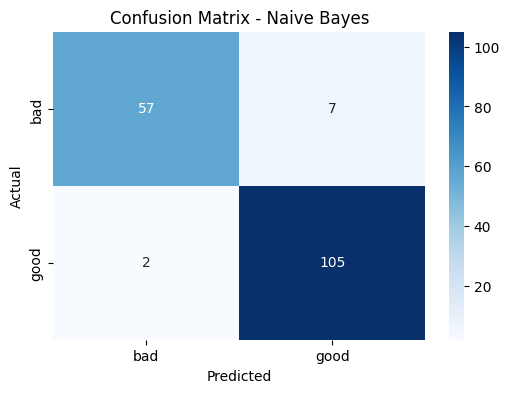

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carregar os dados (substitua pelo seu arquivo real)
# Exemplo com CSV fictício:
# df = pd.read_csv("seus_dados.csv")
# X = df.drop("target", axis=1)
# y = df["target"]

# Exemplo genérico com dados de breast cancer para simular:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# 2. Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# 3. Definir modelos
models = {
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(probability=True),
    "kNN": KNeighborsClassifier(),
    "Tree": DecisionTreeClassifier()
}

# 4. Avaliação
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    mcc = matthews_corrcoef(y_test, y_pred)

    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    acc = report['accuracy']
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']

    results.append([name, auc, acc, f1, precision, recall, mcc])

# 5. Mostrar resultados em tabela
result_df = pd.DataFrame(results, columns=["Model", "AUC", "Accuracy", "F1", "Precision", "Recall", "MCC"])
print(result_df)

# 6. Matriz de confusão para Naive Bayes
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_test)

cm = confusion_matrix(y_test, y_pred_nb)
labels = ['bad', 'good']

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()
